In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks
from sklearn.model_selection import train_test_split

In [2]:
df = pd.DataFrame(pd.read_csv("framingham.csv"))
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
df.shape

(4238, 16)

In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
# Checking Null values
df.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
# zero = df[df['TenYearCHD']==0].iloc[0:557]
# one = df[df['TenYearCHD']==1]
# df = pd.concat([zero,one]).sample(frac = 1)
# df
# print(len(zero))
# print(len(one))

In [10]:
# EDA

In [11]:
auto=df

In [12]:
auto

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [13]:
# Dimension reduction

In [14]:
auto.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


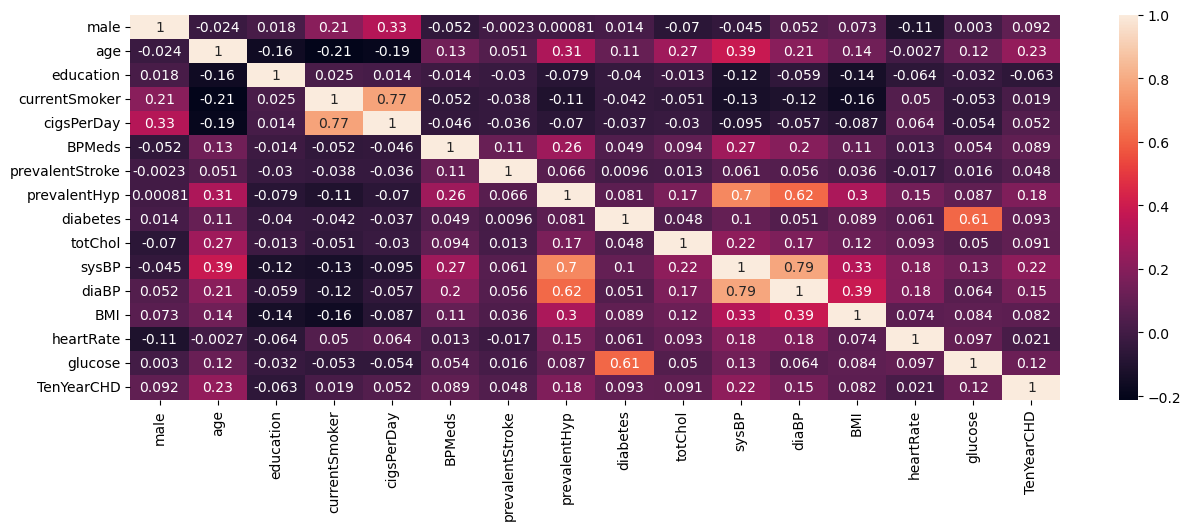

In [15]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [16]:
# Starting ANN

In [17]:
yy = auto[['TenYearCHD']]
XX = auto.drop(['TenYearCHD'],axis = 1)

In [18]:
XX.shape

(3656, 15)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

XX = scaler.fit_transform(XX)
yy = scaler.fit_transform(yy.values.reshape(-1 , 1))

In [20]:
X_train , X_test , y_train , y_test = train_test_split(XX, yy , test_size = 0.05 , random_state = 1)

In [21]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [22]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=15))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

history = model.fit(X_train , y_train , epochs = 1000 , validation_split= 0.30)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8435 - loss: 0.1588 - val_accuracy: 0.8359 - val_loss: 0.1649
Epoch 2/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8485 - loss: 0.1540 - val_accuracy: 0.8359 - val_loss: 0.1639
Epoch 3/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8588 - loss: 0.1407 - val_accuracy: 0.8359 - val_loss: 0.1635
Epoch 4/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8390 - loss: 0.1612 - val_accuracy: 0.8359 - val_loss: 0.1633
Epoch 5/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8380 - loss: 0.1614 - val_accuracy: 0.8359 - val_loss: 0.1631
Epoch 6/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8431 - loss: 0.1569 - val_accuracy: 0.8359 - val_loss: 0.1630
Epoch 7/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8452 - loss: 0.1542 - val_accuracy: 0.8359 - val_loss: 0.1629
Epoch 8/1000
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8515 - loss: 0.1487 - val_accuracy: 0

In [23]:
history.history

{'accuracy': [0.8482106328010559,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8494446873664856,
  0.8490332961082458,
  0.8490332961082458,
  0.8486219644546509,
  0.8486219644546509,
  0.8490332961082458,
  0.8490332961082458,
  0.8486219644546509,
  0.8486219644546509,
  0.8486219644546509,
  0.8482106328010559,
  0.8477992415428162,
  0.8473879098892212,
  0.8482106328010559,
  0.8477992415428162,
  0.8473879098892212,
  0.8477992415428162,
  0.8490332961082458,
  0.8494446873664856,
  0.8486219644546509,
  0.8510900735855103,
  0.8486219644546509,
  0.8498560190200806,
  0.8498560190200806,
  0.8490332961082458,
  0.8494446873664856,
  0.8494446873664856,
  0.8498560190200806,
  0.8494446873664856

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


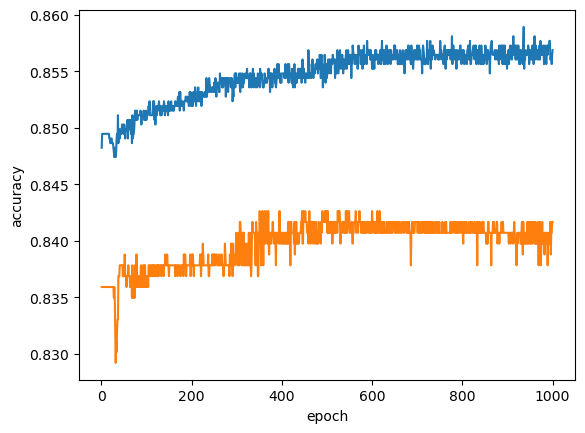

In [24]:

# list all data in history
print(history.history.keys())
tx = [i for i in range(1,1001)]
ty = history.history['accuracy']
ty1 = history.history['val_accuracy']
# summarize history for accuracy
plt.plot(tx,ty)
plt.plot(tx,ty1)

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()



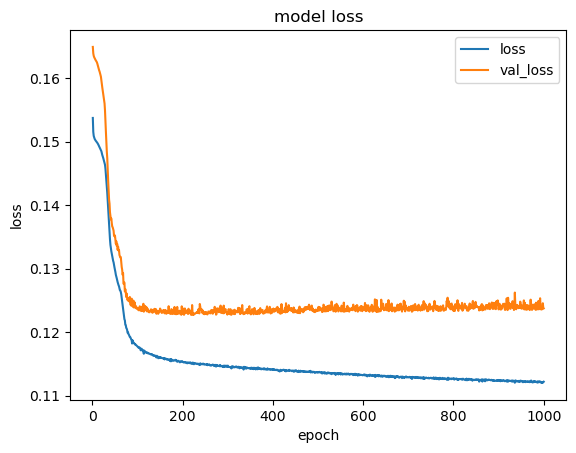

In [25]:
#summarize history for loss
tx = [i for i in range(1,1001)]
ty = history.history['loss']
ty1 = history.history['val_loss']
plt.plot(tx,ty)
plt.plot(tx,ty1)
plt.title('model loss')
plt.legend(['loss', 'val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [26]:
test = model.evaluate(X_test, y_test) # gives loss and accuracy
print(test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9215 - loss: 0.0839 
[0.0945720449090004, 0.8961748480796814]


In [27]:
# serialize weights to HDF5
model.save("model.keras")

In [28]:
from tensorflow.keras.models import load_model
model_loaded = load_model('model.keras')

In [29]:
X_test[10:11]

array([[1.        , 0.31578947, 0.        , 1.        , 0.42857143,
        0.        , 0.        , 1.        , 0.        , 0.24024641,
        0.21040189, 0.41269841, 0.25399903, 0.26262626, 0.09322034]])

In [30]:
model_loaded.predict(X_test[15:16])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0.42898786]], dtype=float32)

In [31]:
y_test[10:11]

array([[0.]])